In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.stats import weightstats as stats
from scipy import stats as st

import seaborn as sns
sns.set_theme()
pd.set_option('mode.chained_assignment', None)


#10.000 row 18 columnluk bir veri ile başlıyoruz.
df=pd.read_csv('/content/Customer-Churn-Records.csv')
churn_df=df.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
churn_df.isnull().sum()

CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
Complain               0
Satisfaction Score     0
Card Type              0
Point Earned           0
age_groups            22
dtype: int64

In [ ]:
len(churn_df['CustomerId'].unique())

10000

In [2]:
churn_df.drop(columns='RowNumber',inplace=True)
churn_df['CustomerId']=np.arange(0,churn_df['Exited'].count())
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,0.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2499.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,4999.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7499.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,9999.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [3]:
churned=churn_df[(churn_df['Exited']==1)]
customers=churn_df[churn_df['Exited']==0]

<ipython-input-4-2d3d8ae490fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = churn_df.drop(columns='CustomerId').corr(method = 'spearman')


Text(0.5, 1.0, 'Churn Customer')

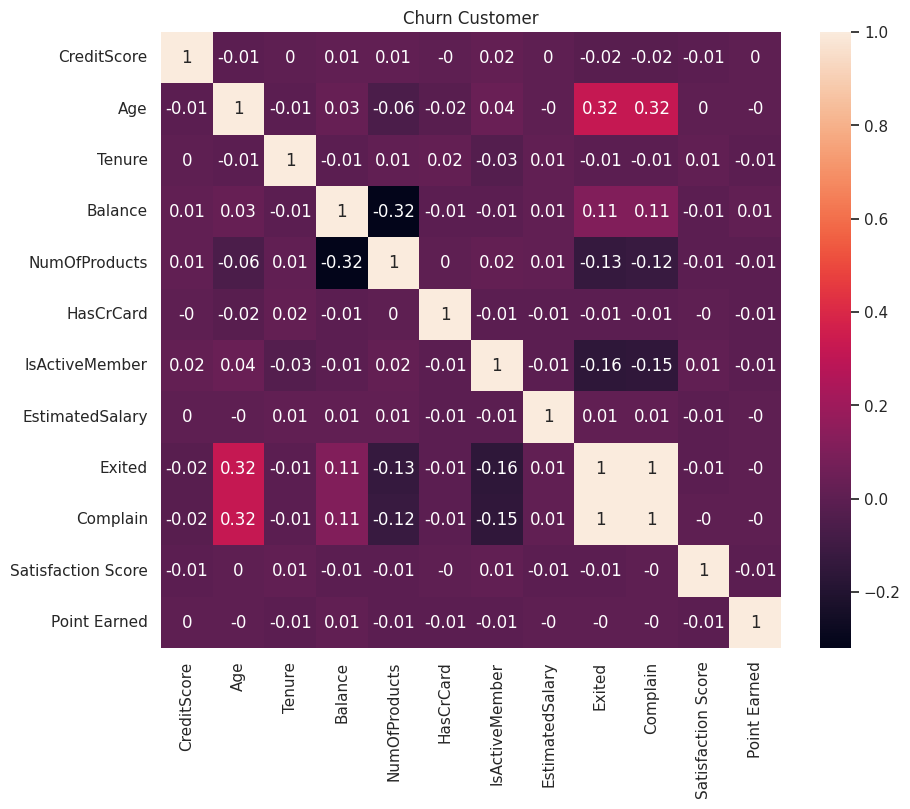

In [4]:
#lighter colors indicate stronger positive correlation. When we look our matris we can see age has stronger corr. with complain and exited values.
cormat = churn_df.drop(columns='CustomerId').corr(method = 'spearman')
plt.figure(figsize=(10,8))
cormat=sns.heatmap(cormat.round(2),annot=True)
cormat.set_title('Churn Customer')


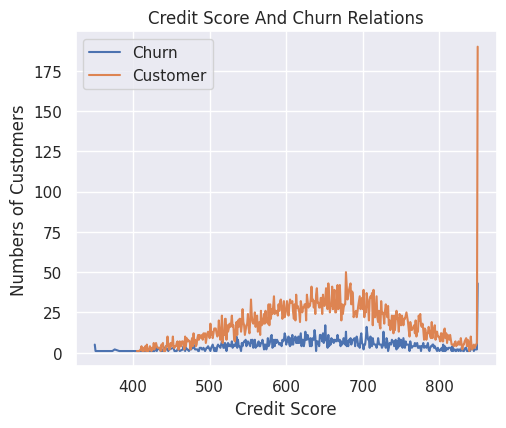

In [5]:
#Credit scores are between 300-850
#300-579 are bad; 580 to 669 are considered fair; 670 to 739 are considered good; 740 to 799 are considered very good; and 800 and up are considered excellent.

churn_by_score=churned.pivot_table(values='Exited',index='CreditScore', aggfunc='count')
cst_by_score=customers.pivot_table(values='Exited',index='CreditScore', aggfunc='count')
plt.figure(figsize=(25,20))

plt.subplot(4,4,1)
plt.plot(churn_by_score)
plt.plot(cst_by_score)
plt.title('Credit Score And Churn Relations')
plt.xlabel('Credit Score')
plt.ylabel('Numbers of Customers')
plt.legend(['Churn', 'Customer'])
plt.show()


In [186]:
low= churn_df[churn_df['CreditScore']<=650]['Exited'].to_numpy()
high= churn_df[churn_df['CreditScore']>650]['Exited'].to_numpy()
len(low)
high_rearr= np.random.choice(high, size=4937)

In [187]:
st.ttest_rel(high_rearr, low)

TtestResult(statistic=-1.1443286345869264, pvalue=0.2525428599567181, df=4936)

GEOGRAPHY

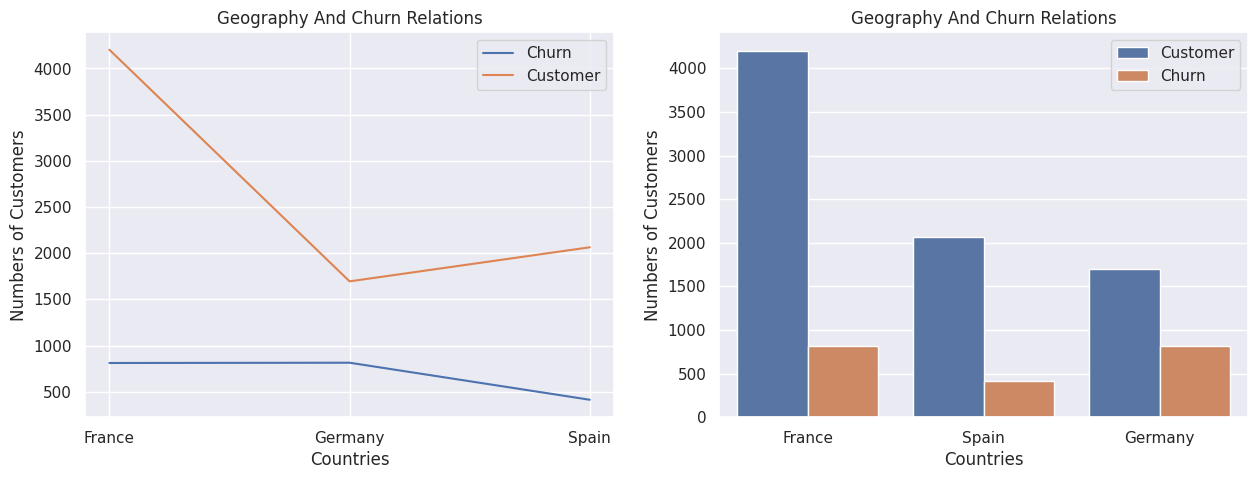

In [146]:
churn_by_geography=churned.pivot_table(values='Exited',index='Geography', aggfunc='count')
cst_by_geography=customers.pivot_table(values='Exited',index='Geography', aggfunc='count')

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(churn_by_geography)
plt.plot(cst_by_geography)
plt.title('Geography And Churn Relations')
plt.xlabel('Countries')
plt.ylabel('Numbers of Customers')
plt.legend(['Churn', 'Customer'])


plt.subplot(1,2,2)
sns.countplot(x='Geography', hue='Exited', data=churn_df)
plt.xlabel('Countries')
plt.ylabel('Numbers of Customers')
plt.title('Geography And Churn Relations')
plt.legend(['Customer', 'Churn'])


SEX

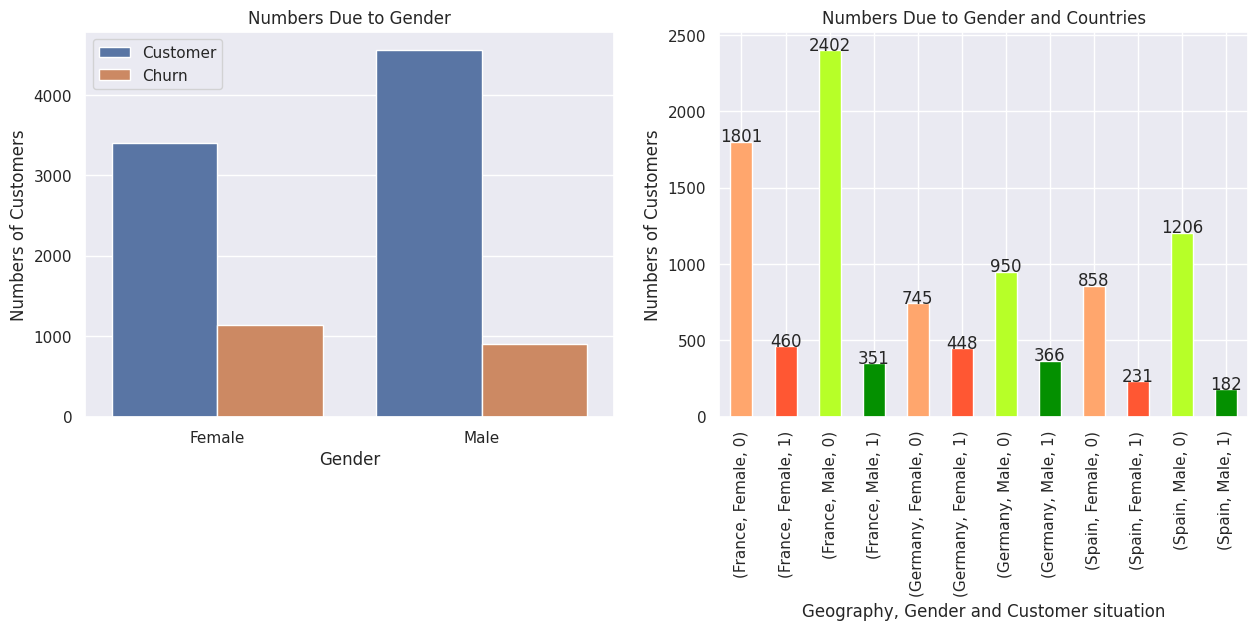

In [154]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x='Gender', hue='Exited', data=churn_df)
plt.ylabel('Numbers of Customers')
plt.title('Numbers Due to Gender')
plt.legend(['Customer', 'Churn'])

plt.subplot(1,2,2)
geo_gend= churn_df.groupby(['Geography','Gender'])['Exited'].value_counts()
a= geo_gend.plot(kind='bar',color=['#FFA66D', '#FF5733', '#B7FF28', '#049000'])
plt.xlabel('Geography, Gender and Customer situation')
plt.ylabel('Numbers of Customers')
plt.title('Numbers Due to Gender and Countries')
for p in a.patches:
  a.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),ha='center')

AGE GROUPS

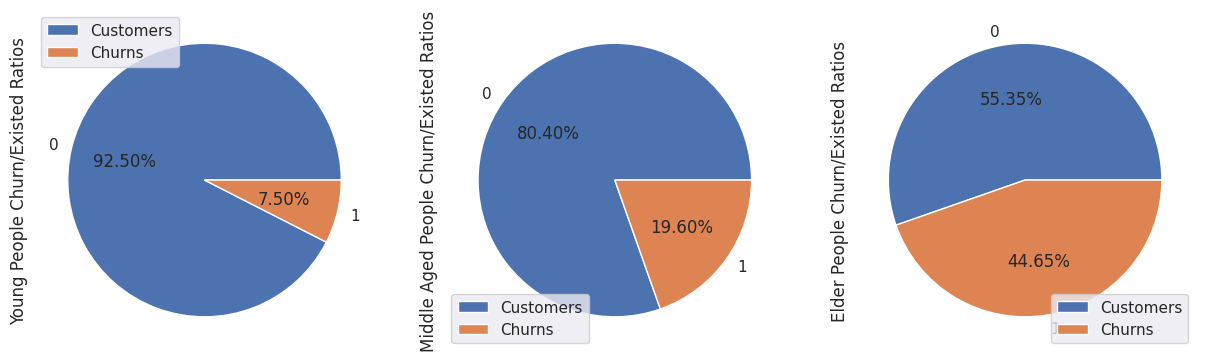

In [157]:
churn_df['age_groups']=pd.cut(churn_df['Age'],bins=[18,30,50,95],labels=['Young','Middle Aged', 'Elder'])
churned['age_groups']=pd.cut(churned['Age'],bins=[18,30,50,95],labels=['Young','Middle Aged', 'Elder'])

young= churn_df[churn_df['age_groups']=='Young']
young_rate=young.groupby('Exited')['CustomerId'].count()
middle_aged= churn_df[churn_df['age_groups']=='Middle Aged']
middle_aged_rate= middle_aged.groupby('Exited')['CustomerId'].count()
elders= churn_df[churn_df['age_groups']=='Elder']
elders_rate= elders.groupby('Exited')['CustomerId'].count()

plt.subplot(1,3,1)
young_rate.plot.pie(label='Young People Churn/Existed Ratios', autopct='%1.2f%%', figsize=(15, 15))
plt.legend(['Customers','Churns'])


plt.subplot(1,3,2)
middle_aged_rate.plot.pie(label='Middle Aged People Churn/Existed Ratios', autopct='%1.2f%%', figsize=(15, 15))
plt.legend(['Customers','Churns'])

plt.subplot(1,3,3)
elders_rate.plot.pie(label='Elder People Churn/Existed Ratios', autopct='%1.2f%%', figsize=(15, 15))
plt.legend(['Customers','Churns'])


Text(0.5, 1.0, 'Churn Rates by Age')

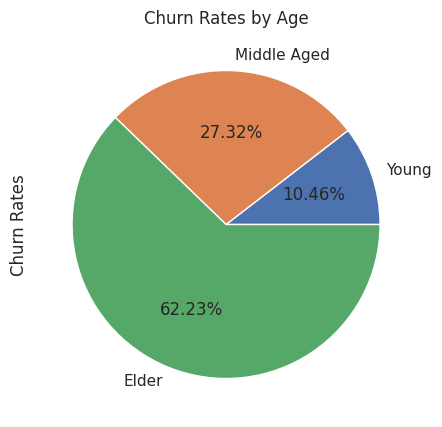

In [173]:

total_by_age= churn_df.groupby('age_groups')['Exited'].count().to_frame()
churn_by_age =churn_df.groupby('age_groups')['Exited'].sum().to_frame()
churn_percent= (churn_by_age*100)/total_by_age
churn_percent.plot.pie(y='Exited',label='Churn Rates',legend=None, autopct='%1.2f%%', figsize=(5, 5))
plt.title('Churn Rates by Age')


In [189]:
young_np=young.Exited.to_numpy()
middle_aged_np= middle_aged.Exited.to_numpy()
elders_np= elders.Exited.to_numpy()

In [190]:
st.ttest_ind(young_np,middle_aged_np, equal_var=False)

Ttest_indResult(statistic=-15.753307654608552, pvalue=1.5516552773758216e-54)

COMPLAIN

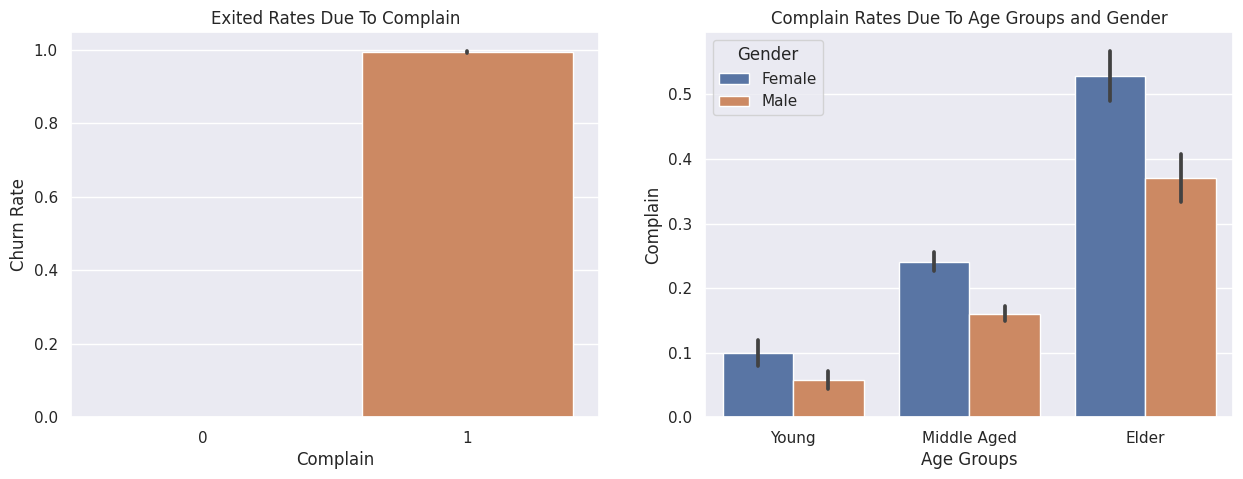

In [167]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='Complain', y='Exited', data=churn_df)
plt.ylabel('Churn Rate')
plt.title('Exited Rates Due To Complain')
#istatistiki test  ekle churn/complain istatistiki anlamlılık

plt.subplot(1,2,2)
sns.barplot(data=churn_df, x='age_groups',y='Complain',hue='Gender')
plt.title('Complain Rates Due To Age Groups and Gender')
plt.xlabel('Age Groups')

plt.show()


In [126]:
complain_numpy= churn_df[churn_df['Complain']==1]['Exited'].to_numpy()

no_complain_numpy= churn_df[churn_df['Complain']==0]['Exited'].to_numpy()
random_no_complain= np.random.choice(no_complain_numpy, size=2044)

In [191]:
st.ttest_ind(complain_numpy,random_no_complain)

Ttest_indResult(statistic=614.203680580343, pvalue=0.0)

IS ACTIVE MEMBER

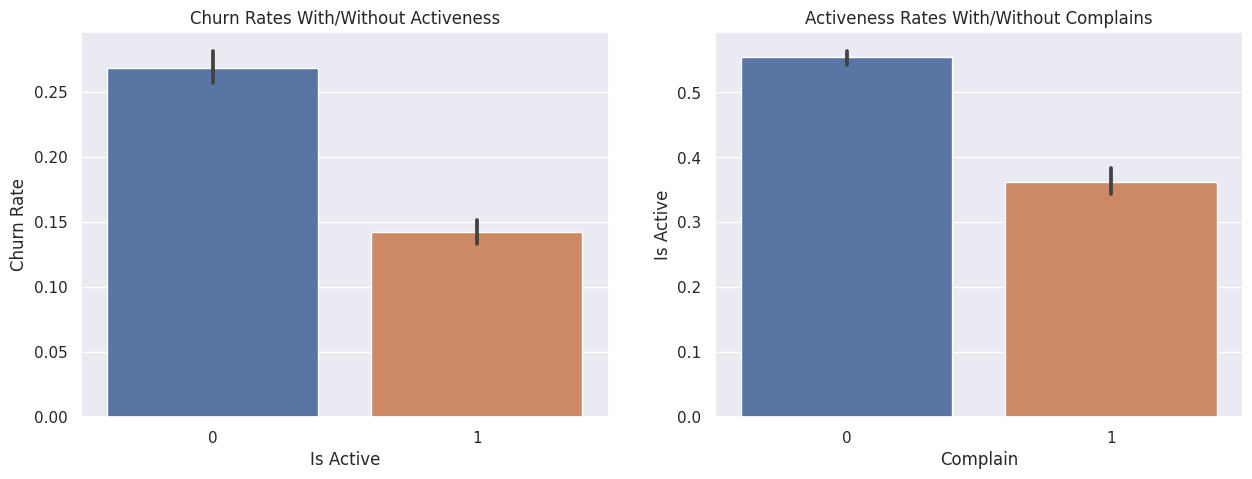

In [192]:
#ISACTIVE MEMBER(AGE)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=churn_df, x='IsActiveMember', y='Exited')
plt.xlabel('Is Active')
plt.ylabel('Churn Rate')
plt.title('Churn Rates With/Without Activeness')

plt.subplot(1,2,2)
sns.barplot(data=churn_df, x='Complain', y="IsActiveMember")
plt.ylabel('Is Active')
plt.title('Activeness Rates With/Without Complains')

plt.show()




Text(0, 0.5, 'Churn Rate')

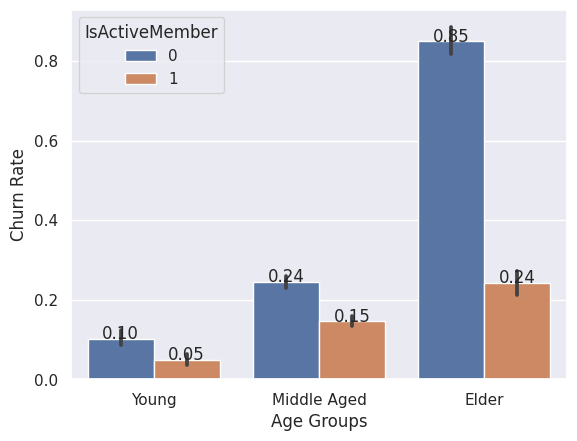

In [163]:
a=sns.barplot(data=churn_df, x='age_groups', y="Exited", hue='IsActiveMember')
for p in a.patches:
  a.annotate(format(p.get_height(),'.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),ha='center')
plt.xlabel('Age Groups')
plt.ylabel('Churn Rate')

In [193]:
active= churn_df[churn_df['IsActiveMember']==1]['Exited'].to_numpy()
not_active= churn_df[churn_df['IsActiveMember']==0]['Exited'].to_numpy()
st.ttest_ind(active,not_active,equal_var=False)

Ttest_indResult(statistic=-15.717841207997152, pvalue=5.883913490258274e-55)

TENURE

Text(0.5, 1.0, 'Tenure Histogram')

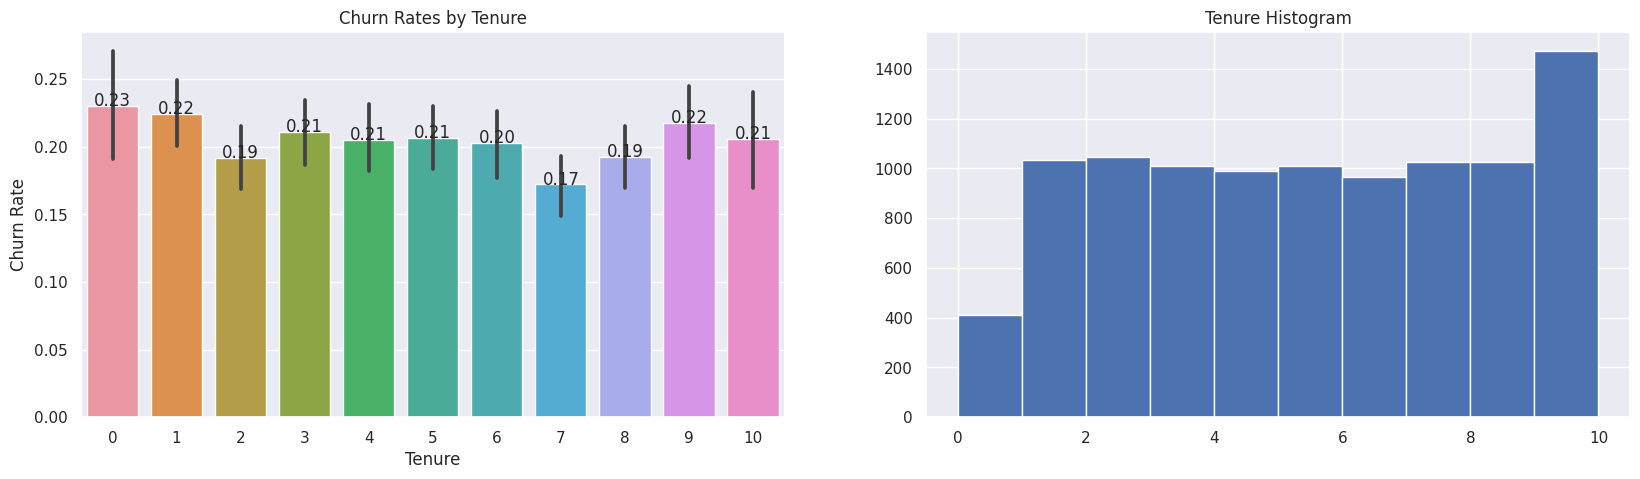

In [176]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
a= sns.barplot(data=churn_df, x='Tenure', y='Exited')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Tenure')
for p in a.patches:
  a.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),ha='center',va='baseline')
plt.subplot(1,2,2)

churn_df['Tenure'].hist()
plt.title('Tenure Histogram')

In [203]:
newer= churn_df[churn_df['Tenure']<=5]['Exited'].to_numpy()
older=churn_df[churn_df['Tenure']>5]['Exited'].to_numpy()
newer= np.random.choice(newer,size=4494)

4494

In [204]:
st.ttest_rel(newer,older)

TtestResult(statistic=0.7581502596980468, pvalue=0.448400798279899, df=4493)

BALANCE

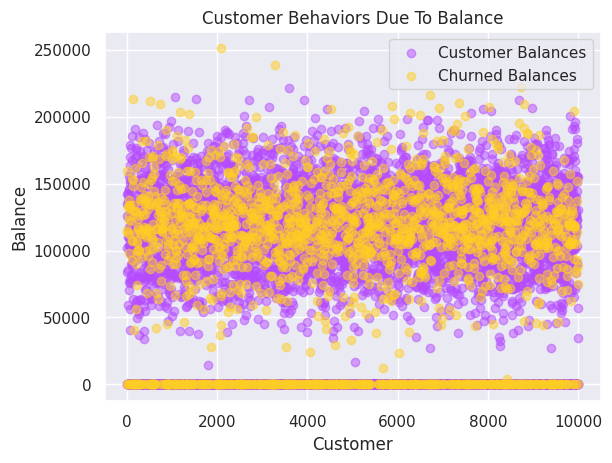

In [ ]:

cst_index= list(customers['CustomerId'].index)
churn_index= list(churned['CustomerId'].index)
plt.scatter(cst_index, customers['Balance'],c='#B54BFF',alpha=0.5)
plt.scatter(churn_index, churned['Balance'],c='#FFCD24',alpha=0.5)
plt.legend(['Customer Balances', 'Churned Balances'])
plt.title('Customer Behaviors Due To Balance')
plt.xlabel('Customer')
plt.ylabel('Balance')
plt.show()

In [219]:
low_balance= churn_df[churn_df['Balance']<=76485]['Exited'].to_numpy()
high_balance= churn_df[churn_df['Balance']>76485]['Exited'].to_numpy()
high_balance=np.random.choice(high_balance,size=4081)

In [220]:
st.ttest_rel(low_balance,high_balance)

TtestResult(statistic=-9.451535625928667, pvalue=5.465127310396538e-21, df=4080)